In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def list_prod(l):
    ret = 1
    for x in l: ret *= x
    return ret

def list_sum(l):
    ret = 0
    for x in l: ret += x
    return ret

In [3]:
x_hat = [0.1, 0.15, 0.2, 0.3, 0.35, 0.5, 0.75]
y_hat = [3.0, 1.0, 1.2, 2.1, 2.0, 2.5, 2.5]

def lagrange_interpolant(x_hat, y_hat):
    phis = []
    for i,x_i in enumerate(x_hat):    
        tmps = [lambda x,x_i=x_i,x_j=x_j: (x - x_j)/(x_i - x_j) for j,x_j in enumerate(x_hat) if i != j]
        phis.append(lambda x, tmps=tmps: list_prod([g(x) for g in tmps]))
    
    L = lambda x, y_hat=y_hat, phis=phis: list_sum([y_hat[i] * phis[i](x) for i,phi in enumerate(phis)])
    return lambda x: L(x), phis

L_1, phis = lagrange_interpolant(x_hat, y_hat)

[]

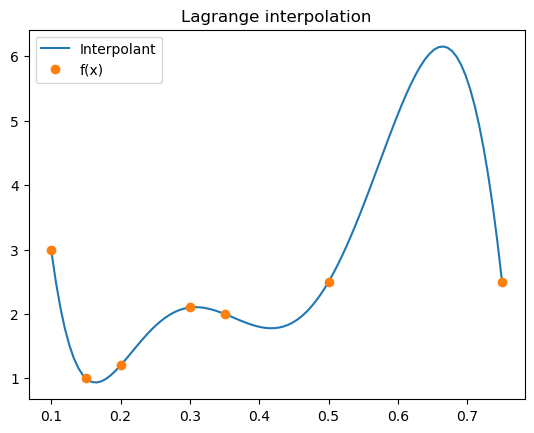

In [4]:
xs = np.linspace(0.1, 0.75, 100)
plt.plot(xs, [L_1(x) for x in xs], label="Interpolant")
plt.plot(x_hat, y_hat, 'o', label="f(x)")
plt.title("Lagrange interpolation")
plt.legend()
plt.plot()

In [5]:
x_hat_new = [0.1, 0.15, 0.2, 0.3, 0.35, 0.5, 0.75]
y_hat_new = [3.0, 2.0, 1.2, 2.1, 2.0, 2.5, 2.5]

L_2, _ = lagrange_interpolant(x_hat_new, y_hat_new)

[]

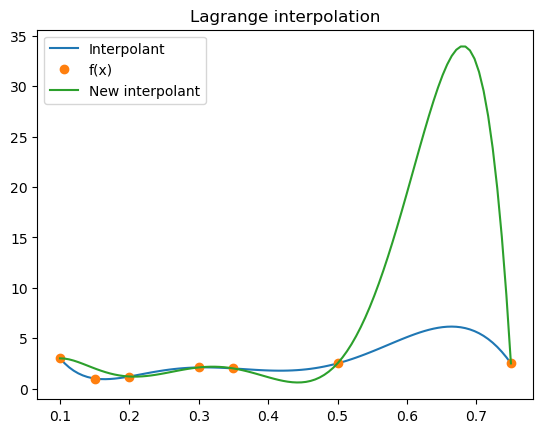

In [6]:
xs = np.linspace(0.1, 0.75, 100)
plt.plot(xs, [L_1(x) for x in xs], label="Interpolant")
plt.plot(x_hat, y_hat, 'o', label="f(x)")
plt.plot(xs, [L_2(x) for x in xs], label="New interpolant")
plt.title("Lagrange interpolation")
plt.legend()
plt.plot()

In [7]:
print("Difference at x* = 0.7 is", L_2(0.7)-L_1(0.7))

Difference at x* = 0.7 is 26.666666666666675


Since $L_n(x) = \sum_{i=1}^n f(x_i)\phi_i(x)$, and $y_2 = f(x_2)$,
$$
\frac{\partial L_n(x)}{\partial y_2} = \phi_2(x)
$$
Then, the gradient at $x^* = 0.7$ is $\phi_2(0.7)$, which evaluates to

In [8]:
print(phis[1](0.7))

26.66666666666667


To check numerically,

In [9]:
def center_diff(f, x, h):
    return (f(x+h) - f(x-h))/(2*h)

grad_old_y2 = center_diff(lambda y2:\
                          lagrange_interpolant(
                            [0.1, 0.15, 0.2, 0.3, 0.35, 0.5, 0.75],
                            [3.0, y2, 1.2, 2.1, 2.0, 2.5, 2.5])[0](0.7), 1.0, 1e-10)
print("Gradient of polynomial with respect to old y2:", grad_old_y2)

grad_new_y2 = center_diff(lambda y2:\
                          lagrange_interpolant(
                            [0.1, 0.15, 0.2, 0.3, 0.35, 0.5, 0.75],
                            [3.0, y2, 1.2, 2.1, 2.0, 2.5, 2.5])[0](0.7), 2.0, 1e-10)
print("Gradient of polynomial with respect to new y2:", grad_new_y2)

Gradient of polynomial with respect to old y2: 26.66666887307656
Gradient of polynomial with respect to new y2: 26.66666887307656


Since the gradient with respect to $y_2$ is constant, we have that 
$$
\frac{\Delta L_n(x)}{\Delta y_2} = \phi_2(x) \\
\Delta L_n(x) = \phi_2(x) \Delta y_2 \\
$$
Since in parts b and c we have that $\Delta y_2 = 1$, we get
$$
\Delta L_n(x) = \phi_2(x) \\
\Delta L_n(x^*) = \phi_2(x^*) = 1 \\
$$
Which is exactly the change in $L(x^*)$ which we found in part c.